## Happy Customers

In [4]:
#!pip install lazypredict

In [5]:
import pandas as pd, numpy as np #for the bins whole numbers
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing #for normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
import lightgbm as lgb
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
#decision tree classifier
from numpy import mean
from numpy import std
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
#import os
#from IPython.display import clear_output
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)
#root_dir = "/content/gdrive/My Drive/Colab Notebooks/Christopher-project"
#os.chdir(root_dir)
#clear_output()

In [6]:
df = pd.read_csv('ACME-HappinessSurvey2020.csv')
print(df)

     Y  X1  X2  X3  X4  X5  X6
0    0   3   3   3   4   2   4
1    0   3   2   3   5   4   3
2    1   5   3   3   3   3   5
3    0   5   4   3   3   3   5
4    0   5   4   3   3   3   5
..  ..  ..  ..  ..  ..  ..  ..
121  1   5   2   3   4   4   3
122  1   5   2   3   4   2   5
123  1   5   3   3   4   4   5
124  0   4   3   3   4   4   5
125  0   5   3   2   5   5   5

[126 rows x 7 columns]


In [7]:
#perform EDA
print('head:\n',df.head())
print('shape:',df.shape) #126, 7 no null columns
print("missing values:\n", df.isnull().sum()) #no null columns
print('info:', df.info()) #none
print('describe', df.describe())

head:
    Y  X1  X2  X3  X4  X5  X6
0  0   3   3   3   4   2   4
1  0   3   2   3   5   4   3
2  1   5   3   3   3   3   5
3  0   5   4   3   3   3   5
4  0   5   4   3   3   3   5
shape: (126, 7)
missing values:
 Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB
info: None
describe            Y     X1     X2     X3     X4     X5     X6
count 126.00 126.00 126.00 126.00 126.00 126.00 126.00
mean    0.55   4.33   2.53   3.31   3.75   3.65   4.25
std     0.50   0.80   1.11   1.02   0.88   1.15   0.81
min     0.00   1.00 

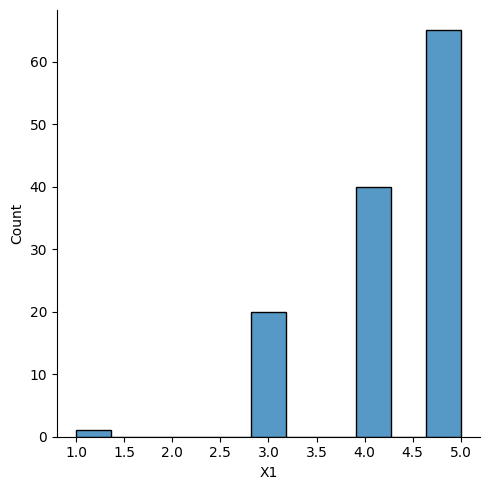

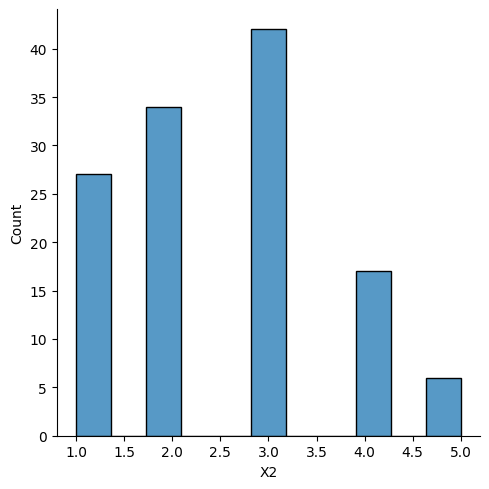

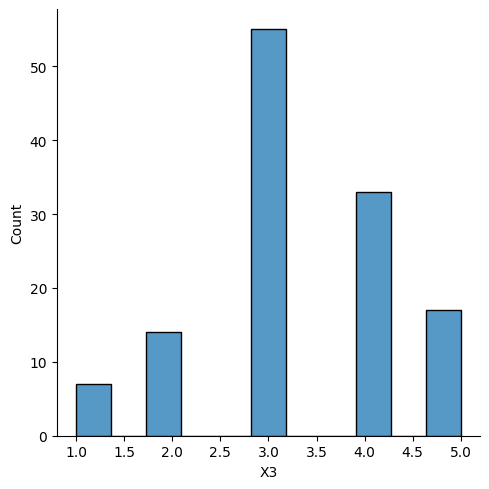

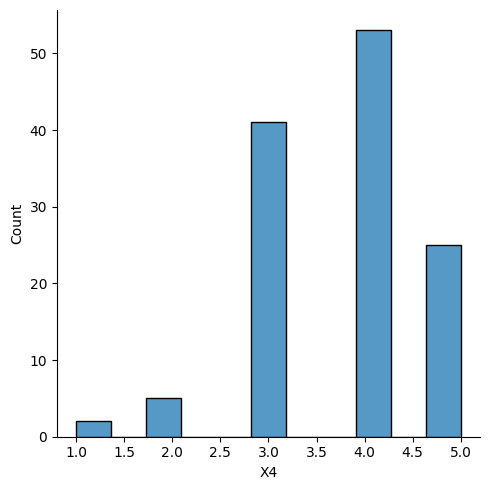

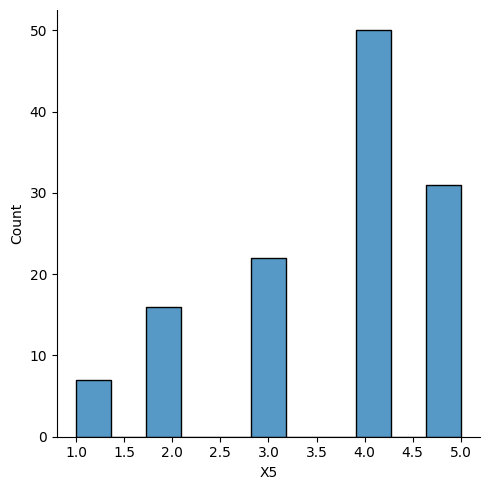

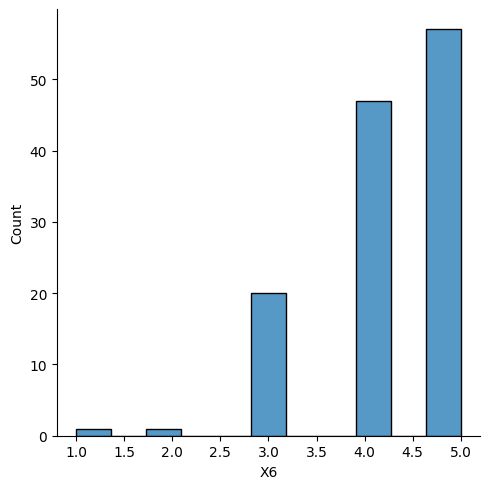

In [8]:
#distribution plot
sns.displot(df, x='X1')
sns.displot(df, x='X2')
sns.displot(df, x='X3')
sns.displot(df, x='X4')
sns.displot(df, x='X5')
sns.displot(df, x='X6')

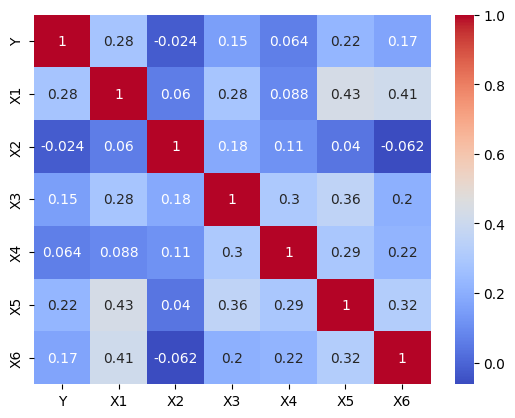

In [9]:
#heatmap
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

In [10]:
#no strong correlation between any of the variables

<Axes: >

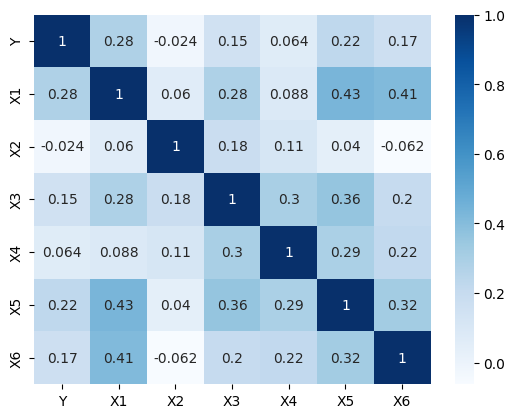

In [11]:
#correlation matrix
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

In [12]:
#correlation matrix shows that there is not a strong relationship between any of the variables

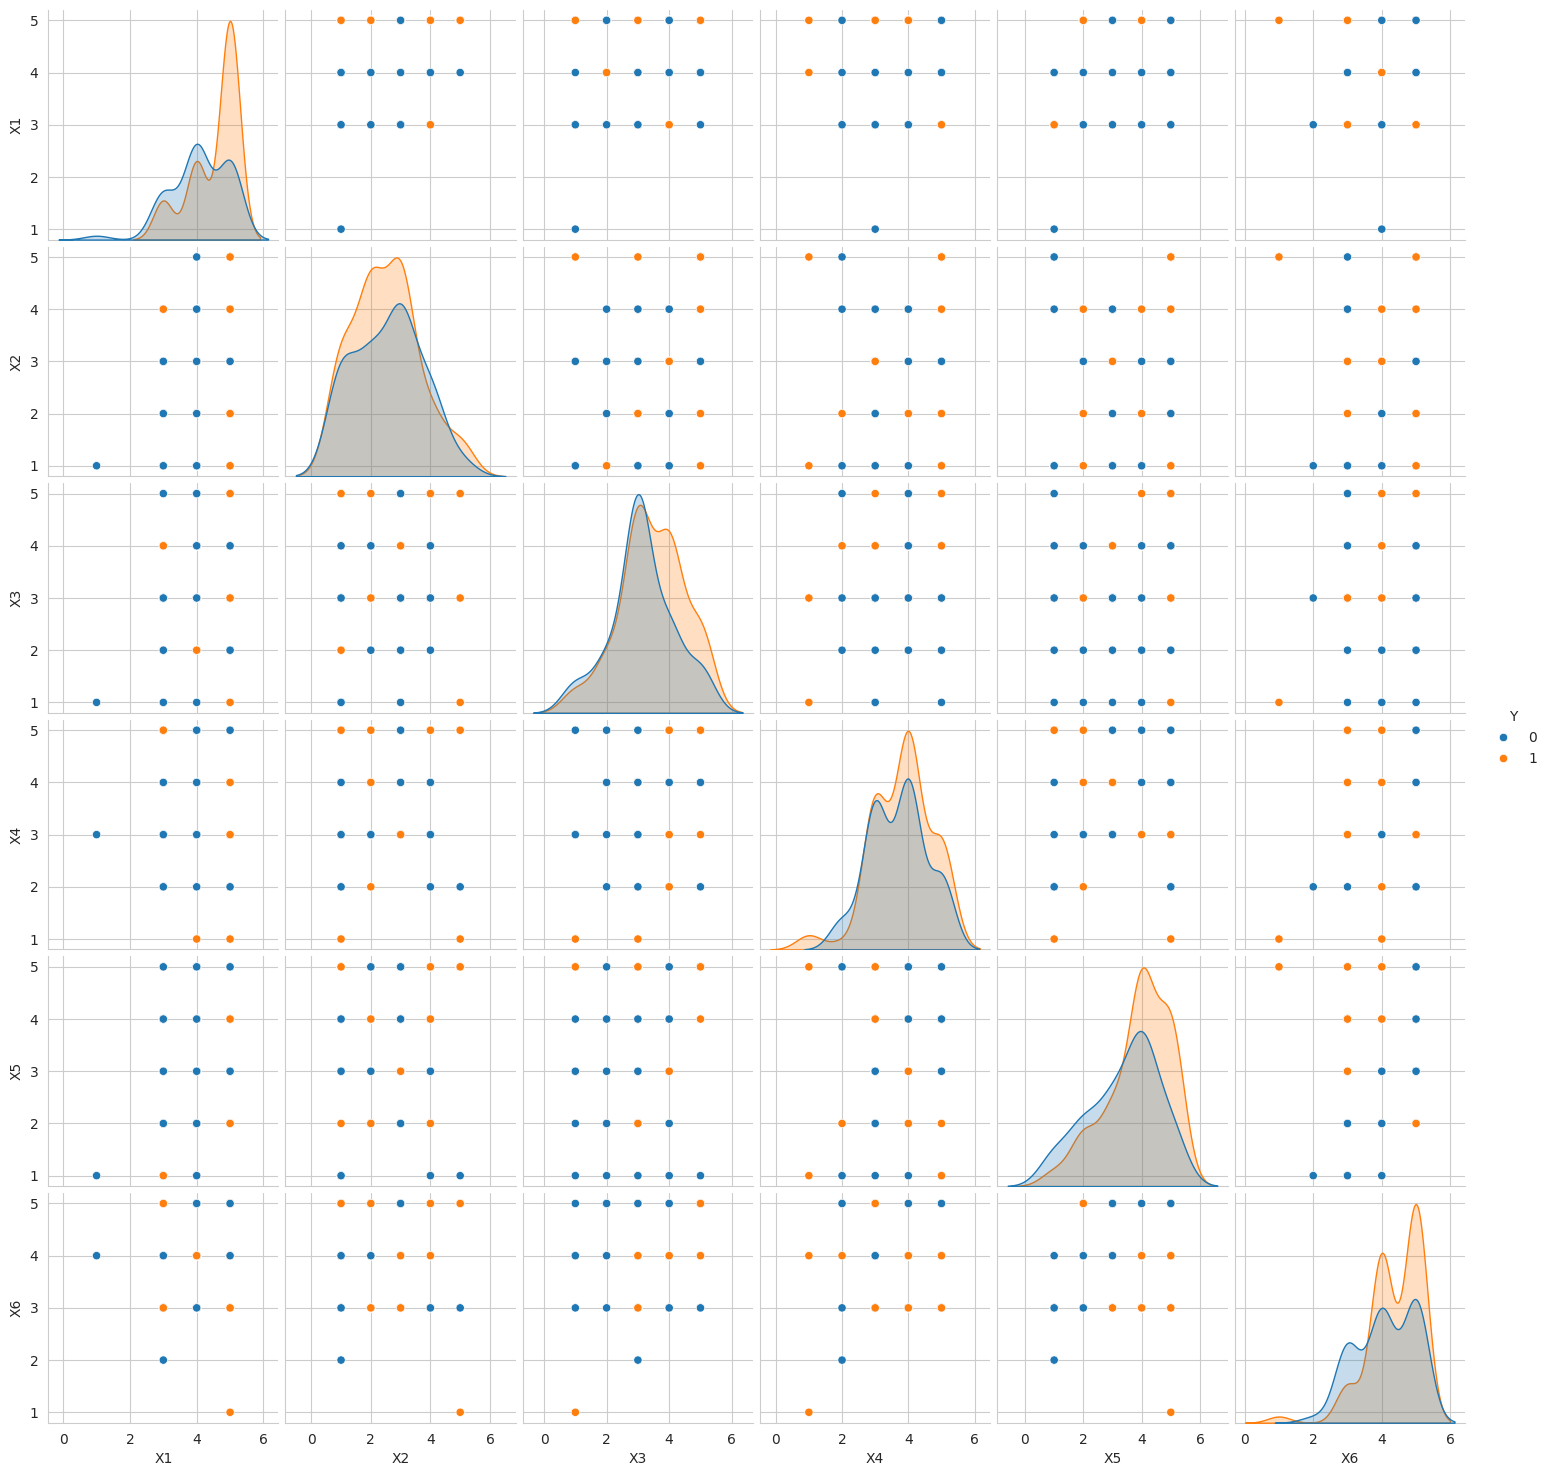

In [13]:
#kernal density estimates
sns.set_style("whitegrid")
sns.pairplot(df, hue='Y')
plt.show()

In [14]:
#define x and y
x = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
y = df['Y']

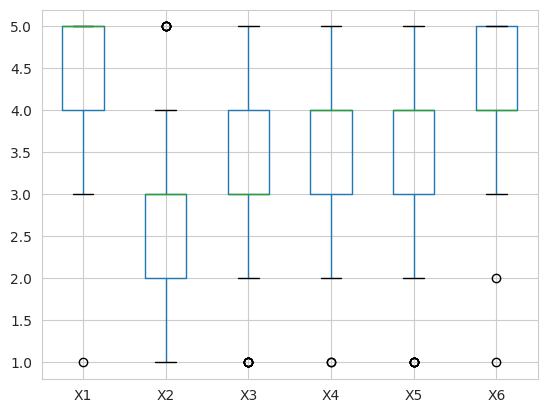

In [15]:
#box plot
data = {'X1': df["X1"], 'X2': df["X2"], 'X3': df["X3"], 'X4': df["X4"], 'X5': df["X5"], 'X6': df["X6"]}
df = pd.DataFrame(data)
df.boxplot()
plt.show()

In [16]:
import random
#seed = random.randint(1000,9999)
seed = 2091 #works well
print(seed)

2091


In [17]:
#split data into training and test set
##X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4)
##print('Train_set', X_train.shape, y_train.shape)
##print('Test_set', X_test.shape, y_test.shape)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.10, random_state=seed)#.5,70
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 23.37it/s]

[LightGBM] [Info] Number of positive: 61, number of negative: 52
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 113, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.539823 -> initscore=0.159630
[LightGBM] [Info] Start training from score 0.159630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.85,0.88,0.88,0.85,0.18
ExtraTreesClassifier,0.77,0.81,0.81,0.77,0.14
BaggingClassifier,0.77,0.78,0.78,0.77,0.04
KNeighborsClassifier,0.77,0.78,0.78,0.77,0.02
NuSVC,0.77,0.78,0.78,0.77,0.02
BernoulliNB,0.77,0.74,0.74,0.76,0.02
LGBMClassifier,0.69,0.71,0.71,0.70,0.15
XGBClassifier,0.69,0.71,0.71,0.70,0.10
DecisionTreeClassifier,0.69,0.71,0.71,0.70,0.02


Confusion matrix

 [[4 1]
 [2 6]]

True Positives(TP) =  4

True Negatives(TN) =  6

False Positives(FP) =  1

False Negatives(FN) =  2


<Axes: >

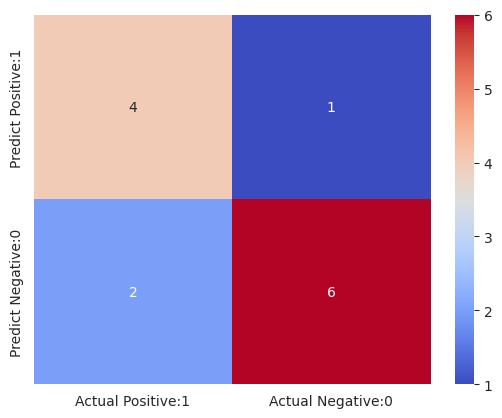

In [18]:
bagging_clf = BaggingClassifier(estimator=RandomForestClassifier(),
                        n_estimators=10, random_state=seed).fit(X_train, y_train)
y_hat = bagging_clf.predict(X_test)
#confusion matrix
cm = confusion_matrix(y_test, y_hat)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='coolwarm')

In [19]:
#Hyper-parameter optimization random search with random forest
#model = GradientBoostingRegressor()
parameters = {
 'bootstrap': [True, False],
 'bootstrap_features': [True, False],
 'n_estimators': [5, 10, 15],
 'max_samples' : [0.6, 0.8, 1.0],
 'max_features' : [0.6, 0.8, 1.0]
}

random_src = RandomizedSearchCV(estimator=bagging_clf, param_distributions = parameters, cv=2, n_iter = 10, n_jobs=-1)
random_src.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", random_src.best_estimator_)
print("\n The best score across ALL searched params:\n", random_src.best_score_)
print("\n The best parameters across ALL searched params:\n", random_src.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 BaggingClassifier(estimator=RandomForestClassifier(), max_features=0.6,
                  max_samples=0.6, n_estimators=5, random_state=2091)

 The best score across ALL searched params:
 0.5487155388471179

 The best parameters across ALL searched params:
 {'n_estimators': 5, 'max_samples': 0.6, 'max_features': 0.6, 'bootstrap_features': False, 'bootstrap': True}


In [20]:
#normalize
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.67332005,  0.42167606, -0.30364219,  0.29114981, -1.44416589,
        -0.31506076],
       [-1.67332005, -0.47885247, -0.30364219,  1.43755219,  0.30549663,
        -1.55561249],
       [ 0.83666003,  0.42167606, -0.30364219, -0.85525257, -0.56933463,
         0.92549097],
       [ 0.83666003,  1.32220458, -0.30364219, -0.85525257, -0.56933463,
         0.92549097],
       [ 0.83666003,  1.32220458, -0.30364219, -0.85525257, -0.56933463,
         0.92549097]])

In [21]:
#Logistic Regression
#from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=1.0, solver='liblinear', random_state=seed)
LR.fit(X_train, y_train)
LR

LogisticRegression(random_state=2091, solver='liblinear')

In [22]:
#predict using training set
yhat = LR.predict(X_test)
yhat
yhat_prob = LR.predict_log_proba(X_test)
yhat_prob

array([[-1.07661723, -0.41664676],
       [-1.00849313, -0.45376534],
       [-0.59483149, -0.80219341],
       [-0.9248847 , -0.50513707],
       [-1.10303742, -0.40325987],
       [-0.87679904, -0.53804737],
       [-0.6890694 , -0.69724165],
       [-0.6652787 , -0.72181463],
       [-0.37575668, -1.16081568],
       [-0.92439779, -0.50545721],
       [-1.2407186 , -0.3413309 ],
       [-1.06850336, -0.4208665 ],
       [-0.64494369, -0.74379244]])

In [23]:
#accuracy score-logistic regression
acc = accuracy_score(y_test, yhat)
print("accuracy", acc*100)

accuracy 69.23076923076923


In [24]:
#Logistic regression accuract is 54%
#now it is 69.23%

Confusion matrix

 [[3 2]
 [2 6]]

True Positives(TP) =  3

True Negatives(TN) =  6

False Positives(FP) =  2

False Negatives(FN) =  2


<Axes: >

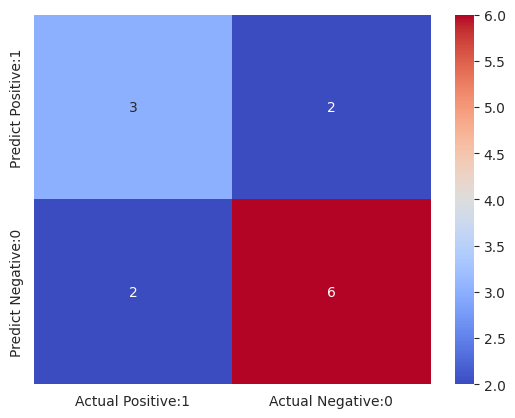

In [25]:
#confusion matrix
cm = confusion_matrix(y_test, yhat)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='coolwarm')

In [26]:
#out of 28 positive, 15 were predicted correctly
#out of 35 negative, 24 were predicted correctly
#now
#now out of 5 positive, 3 were predicted correctly
#now out of 8 negative, 6 were predicted correctly

In [27]:
#Uniform Classifier b/c balanced datasets
uniform_dummy_clf = DummyClassifier(strategy='uniform', random_state=seed)
uniform_dummy_clf.fit(X_train, y_train)
uniform_dummy_pred = uniform_dummy_clf.predict(X_test)

print("Accuracy (Uniform Dummy Classifier):", accuracy_score(y_test, uniform_dummy_pred))
print("\nClassification Report (Uniform Dummy Classifier):")
print(classification_report(y_test, uniform_dummy_pred))

Accuracy (Uniform Dummy Classifier): 0.5384615384615384

Classification Report (Uniform Dummy Classifier):
              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       0.62      0.62      0.62         8

    accuracy                           0.54        13
   macro avg       0.51      0.51      0.51        13
weighted avg       0.54      0.54      0.54        13



In [28]:
#dummy classifier accuracy is 56%
##Class 0 has a precision, recall, and f1-score of .47, .58, and .52 respectively
#Class 1 has a precision, recall, and fl-score of .65, .54, and .59 respectively
#now
#dummy classifier accuracy is 53.85%
#Class 0 has a precision, recall, and fl-score of .40, .40, and .40 respectively
#Class 1 has a precision, recall, and fl-score of .62, .62, and .62 respectively

In [29]:
#Bernoulli Naive Bayes
x = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
#y = df['Y']
cv = CountVectorizer()
x = cv.fit_transform(x)

#from sklearn.model_selection import train_test_split
bnb = BernoulliNB(binarize = 0.0)
model = bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)

print(classification_report(y_test, y_pred))
print(model.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.62      1.00      0.76         8

    accuracy                           0.62        13
   macro avg       0.31      0.50      0.38        13
weighted avg       0.38      0.62      0.47        13

0.6153846153846154


In [30]:
#model accuracy is 59%
#Class 0 has a precision, recall, and f1-score of 0, 0, and 0
#Class 1 has a precision, recall, and fl-score of .59, 1, and .74 respectively
#now
#model accuracy is 61.54%
#Class 0 has a precision, recall, and fl-score of 0, 0, and 0
#Class 1 has a precision, recall, and fl-score of .62, 1, and .76

In [31]:
#LGBM Classifier
clf1 = lgb.LGBMClassifier(random_state=seed)
clf1.fit(X_train, y_train)

y_pred=clf1.predict(X_test)
y_pred_train = clf1.predict(X_train)

print('Training-set accuracy score: {0:0.4f}' . format(accuracy_score(y_train, y_pred_train)))
print('Test-set accuracy score: {0:0.4f}' . format(accuracy_score(y_test, y_pred)))

[LightGBM] [Info] Number of positive: 61, number of negative: 52
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 113, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.539823 -> initscore=0.159630
[LightGBM] [Info] Start training from score 0.159630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [32]:
#accuracy of training set is 67%
#accuracy of test set is 70%
#now
#accuracy of training set is 76.11%
#accuract of test set is 69.23%

In [33]:
#nearest centroid
model = NearestCentroid()
model.fit(X_train, y_train.values.ravel())

print(f"Training Set Score : {model.score(X_train, y_train) * 100} %")
print(f"Test Set Score : {model.score(X_test, y_test) * 100} %")
print(f"Model Classification Report : \n{classification_report(y_test, model.predict(X_test))}")

Training Set Score : 60.17699115044248 %
Test Set Score : 69.23076923076923 %
Model Classification Report : 
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.75      0.75      0.75         8

    accuracy                           0.69        13
   macro avg       0.68      0.68      0.68        13
weighted avg       0.69      0.69      0.69        13



In [34]:
#accuracy is 57% and 60% in the training set and test set respectively
#Class 0 has a precision, recall, and f1-score of .52, .62, and .56 respectively
#Class 1 has a precision, recall, and fl-score of .69, .59, and .64 respectively
#now
#accuracy is 60.18% and 69.23% in the training set and test set respectively
#Class 0 has a precision, recall, and f1-score of .60, .60, and .60 respectively
#Class 1 has a precision, recall, and f1-score of .75, .75, and .75 respectively

In [35]:
#Voting Ensemble method
log = LogisticRegression(random_state=seed)
rnd = RandomForestClassifier(n_estimators=100, random_state=seed)
svm = SVC(random_state=seed)

voting = VotingClassifier(estimators=[('logistics_regression', log), ('random_forest', rnd), ('support_vector_machine', svm)], voting='hard')

#voting.fit(X_train, y_train)

#VotingClassifier(estimators=[('logistics_regression', LogisticRegression(random_state=42)), ('random_forest', RandomForestClassifier(random_state=42)), ('support_vector_machine', SVC(random_state=42))])

for clf in (log, rnd, svm, voting):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    class_report = classification_report(y_test, y_pred)
    print(class_report)
#rnd.fit(X_train, y_train)
#print(clf.feature_importances_)
#feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
#print(feature_scores)

LogisticRegression 0.6153846153846154
              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.67      0.75      0.71         8

    accuracy                           0.62        13
   macro avg       0.58      0.57      0.58        13
weighted avg       0.60      0.62      0.61        13

RandomForestClassifier 0.7692307692307693
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.86      0.75      0.80         8

    accuracy                           0.77        13
   macro avg       0.76      0.78      0.76        13
weighted avg       0.78      0.77      0.77        13

SVC 0.6923076923076923
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.75      0.75      0.75         8

    accuracy                           0.69        13
   macro avg       0.68  

In [ ]:
#Stacking ensemble method #use another model with this base model, replace logistis regression with svm

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_test_size=0.2, random_state=42)

base_models = [RandomForestClassifier(n_estimators=100, random_state=seed), LogisticRegression(max_iter=1000, random_state=seed)]

train_predictions = np.zeros((len(X_train), len(base_models)))
test_predictions = np.zeros((len(X_test), len(base_models)))

for i, model in enumerate(base_models):
  model.fit(X_train, y_train)
  train_predictions[:, i] = model.predict(X_train)
  test_predictions[:, i] = model.predict(X_test)

meta_model = LogisticRegression(max_iter=1000, random_state=seed)
meta_model.fit(train_predictions, y_train)

final_predictions = meta_model.predict(test_predictions)

accuracy = accuracy_score(y_test, final_predictions)
print("Final Model Accuracy:", accuracy)

class_report = classification_report(y_test, y_pred)
print(class_report)

Final Model Accuracy: 0.7692307692307693
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.75      0.75      0.75         8

    accuracy                           0.69        13
   macro avg       0.68      0.68      0.68        13
weighted avg       0.69      0.69      0.69        13



# Random Forest Experiment

Since so far Random Forest yielded the best performing results, we'll explore if we can further improve the results and whether it could help eliminate some features.

In [37]:
#Random Forest, acccuracy 77% and Recall for class 0 is 80%

rnd = RandomForestClassifier(n_estimators=100, random_state=seed)

rnd.fit(X_train, y_train)

y_pred = rnd.predict(X_test)
print(rnd.__class__.__name__, accuracy_score(y_test, y_pred))
class_report = classification_report(y_test, y_pred)
print(class_report)

#print(clf.feature_importances_)
#feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
#print(feature_scores)

RandomForestClassifier 0.7692307692307693
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.86      0.75      0.80         8

    accuracy                           0.77        13
   macro avg       0.76      0.78      0.76        13
weighted avg       0.78      0.77      0.77        13



Text(0.5, 0, 'Permutation Importance')

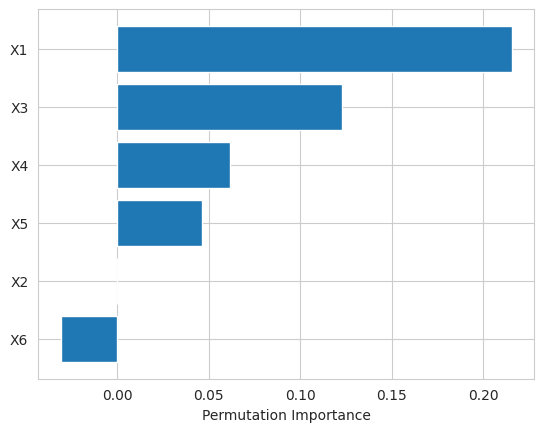

In [38]:
# We're using Random Forest to see the importance of features via permutation importance

from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

perm_importance = permutation_importance(rnd, X_test, y_test, random_state=seed)
feature_names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [39]:
#perm_importance.importances_mean

array([ 2.15384615e-01,  4.44089210e-17,  1.23076923e-01,  6.15384615e-02,
        4.61538462e-02, -3.07692308e-02])

It looks like for the Random Forest model X1, X3, X4 are the most important features while X6 seems to have a negative affect in the performance. We'll see if eliminating these features could further help the model to achieve better performance or comparable results with the original features.

# Feature Elimination Test with RFE

Previously we identified some features to eliminate but let's see what we can gather with RFE.

In [41]:
# We'll use the same Random Forest model for the RFE

estimator = rnd

selector = RFE(estimator=estimator, n_features_to_select=3)

selector.fit(X_train, y_train)

print(selector.support_)

print(selector.ranking_)

[False  True False  True  True False]
[3 1 2 1 1 4]


Since we have the features as X1, X2, X3, X4, X5 and X6 in this order the top 3 features RFE selector identifies are X2, X4, and X5. Previously with Permutation importance the top 3 features we found were X1, X3, and X4. Let's test which of these combinations perform better and finally compare their performance with the original features.

In [42]:
X_train

,X1,X2,X3,X4,X5,X6
93,5,4,4,4,4,5
26,3,3,3,5,5,5
95,5,5,5,5,5,5
16,5,3,4,5,4,5
100,5,2,2,4,5,5
...,...,...,...,...,...,...
106,5,1,5,3,5,5
33,3,2,4,4,4,5
23,5,1,2,5,2,4
124,4,3,3,4,4,5


In [44]:

# We'll use only X1, X3, and X4 as features from Permutation Importance

X_train_x1_x3_x4 = X_train[['X1', 'X3', 'X4']]
X_test_x1_x3_x4 = X_test[['X1', 'X3', 'X4']]

rnd_x1_x3_x4 = RandomForestClassifier(n_estimators=100, random_state=seed)
rnd_x1_x3_x4.fit(X_train_x1_x3_x4, y_train)

y_pred = rnd_x1_x3_x4.predict(X_test_x1_x3_x4)
print(rnd.__class__.__name__, accuracy_score(y_test, y_pred))
class_report = classification_report(y_test, y_pred)
print(class_report)

RandomForestClassifier 0.6923076923076923
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      0.50      0.67         8

    accuracy                           0.69        13
   macro avg       0.78      0.75      0.69        13
weighted avg       0.83      0.69      0.68        13



It looks like the recall for class 0 is almost perfect but the overall accuracy suffers this way when we use X1, X3, and X4 as feature set. Let's explore the features from RFE now.

In [46]:
# We'll use only X2, X4, and X5 as features from RFE

X_train_x2_x4_x5 = X_train[['X2', 'X4', 'X5']]
X_test_x2_x4_x5 = X_test[['X2', 'X4', 'X5']]

rnd_x2_x4_x5 = RandomForestClassifier(n_estimators=100, random_state=seed)
rnd_x2_x4_x5.fit(X_train_x2_x4_x5, y_train)

y_pred = rnd_x2_x4_x5.predict(X_test_x2_x4_x5)
print(rnd.__class__.__name__, accuracy_score(y_test, y_pred))
class_report = classification_report(y_test, y_pred)
print(class_report)

RandomForestClassifier 0.6153846153846154
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.71      0.62      0.67         8

    accuracy                           0.62        13
   macro avg       0.61      0.61      0.61        13
weighted avg       0.63      0.62      0.62        13



It looks like when we use the features from RFE the performance is not as good as features suggested by the permutation importance. Finally, we can select X1, X3, and X4.

# Conclusion
The task is to use a survey and based on the answers to 6 metrics predict if the customer is going to be satisfied or not. There are 6 features with 126 records and 1 target feature. The target value is binary and discrete, so binomial classification is used. Classification uses supervised learning and logistic regression. There is no correletion between the variables of the set for this problem. Features 1, 2, and 6 have outliers. Lazy predict helped to choose with highest accuracy methods to use which were Bernoulli Naive Bayes, LGBM classifier, and Nearest centroid.

Hyper-parameter optimazation random search with random forest was used which uses trial and error to find the best hyperparameters. Random search is the prefered method over grid search. The random search does not try out all parameter values. The best combination of hyperparameters are found for a given validation dataset.
Dummy classifers benchmark the performance of models. Uniform dummy classifer is a type of dummy classifier that produces random predictions for every class. It is useful when there is no information on the class distribution.

Bernoulli Naive Bayes, LGBM classifier, and Nearest centroid were selected because the original random seed value using the lazy predict showed them as performing with a high accuracy. Bernolli Naive Bayes is a type of Naive Bayes used with binary distributions. It makes predictions on past events with them being independent. LGBM is short for Light Gradient Boosting Machine Classifier and is used because of its speed, precision, and accuracy. Nearest centroid computes for each class a centroid while classifying data points to their nearest centroid.

Ensemble methods use multiple models predictions to build better results and performance over using just one model. Two ensemble methods are used, the simple method of voting and the advanced method of stacking. The voting ensemble method has each models use a vote or prediction and the majority is the final prediction. The stacking ensemble method uses predictions on mulitple models bulding a new model for the use of test set predictions.
Decision tree classifier can be used with classification and regression. A decision tree starts with a root and has branches and it splits the records. Subsets are used to break up the nodes and it is built recursively.

Choosing a good seed allowed for lazy predict to choose different methods with more accuracy. The goal was 73% accuracy, but the more accurate methods allowed for 85%. Several predicted methods showed 77%. SVM acheived 88%. The voting and stacking ensemble methods were used with the more accurate methods.

To solve the problem, Random Forest was used to find the important features. The features 1, 3, and 4 are the important features that performed the best with 69% accuracy compared to the other three features which were 62% accuracy. In the test performed with the three important features used, there was a recall value of 1.00 on one of them.
Feature 1 = my order was delivered on time
Feature 3 = I ordered everything I wanted to order
Feature 4 = I paid a good price for my order
So the best course of action is to have a good price with everyhing ordered and on time.